___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.compose import make_column_transformer
import cufflinks as cf
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
soldiers_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')
soldiers_female = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq', encoding='latin-1')

## Explore Data

In [3]:
soldiers_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
soldiers_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
soldiers_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [6]:
soldiers_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [7]:
soldiers_female.shape

(1986, 108)

In [8]:
soldiers_male.shape

(4082, 108)

In [9]:
soldiers = pd.concat([soldiers_male, soldiers_female], axis=0, ignore_index= True)
soldiers

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [10]:
soldiers.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [11]:
soldiers.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [12]:
soldiers.isnull().sum().sort_values()/len(soldiers)

interscyei                        0.000000
suprasternaleheight               0.000000
stature                           0.000000
span                              0.000000
sleeveoutseam                     0.000000
sleevelengthspinewrist            0.000000
sittingheight                     0.000000
shoulderlength                    0.000000
shoulderelbowlength               0.000000
shouldercircumference             0.000000
radialestylionlength              0.000000
tenthribheight                    0.000000
poplitealheight                   0.000000
overheadfingertipreachsitting     0.000000
neckcircumferencebase             0.000000
neckcircumference                 0.000000
mentonsellionlength               0.000000
lowerthighcircumference           0.000000
lateralmalleolusheight            0.000000
lateralfemoralepicondyleheight    0.000000
kneeheightsitting                 0.000000
kneeheightmidpatella              0.000000
interscyeii                       0.000000
palmlength 

In [13]:
soldiers.drop(['SubjectId', 'subjectid'], axis=1, inplace=True)

In [14]:
soldiers.duplicated().sum()

0

In [15]:
soldiers['Ethnicity'].value_counts(dropna=False, normalize=True)

NaN                                                   0.765821
Mexican                                               0.058833
Puerto Rican                                          0.030158
Caribbean Islander                                    0.020435
Filipino                                              0.011042
Cherokee                                              0.010712
Korean                                                0.008734
Dominican                                             0.005274
Chinese                                               0.004285
Japanese                                              0.003626
Vietnamese                                            0.003461
Colombian                                             0.002802
Cuban                                                 0.002802
Arab or Middle Eastern                                0.002802
Salvadoran                                            0.002637
East/Asian Indian                                     0

In [16]:
soldiers.drop(['Ethnicity'], axis=1, inplace=True)

In [17]:
soldiers.shape

(6068, 106)

In [18]:
soldiers.corrwith(soldiers['DODRace']).sort_values(ascending=False)

DODRace                           1.000000
interpupillarybreadth             0.140017
bizygomaticbreadth                0.100792
heelbreadth                       0.076786
headbreadth                       0.055987
bitragionchinarc                  0.047683
SubjectNumericRace                0.017987
Age                               0.004738
bitragionsubmandibulararc        -0.020004
tragiontopofhead                 -0.021191
earprotrusion                    -0.029490
lowerthighcircumference          -0.037853
thighcircumference               -0.042693
earlength                        -0.042940
mentonsellionlength              -0.044308
footbreadthhorizontal            -0.053260
headcircumference                -0.054221
thighclearance                   -0.060196
buttockdepth                     -0.063854
hipbreadthsitting                -0.065287
bicepscircumferenceflexed        -0.066587
palmlength                       -0.074414
chestdepth                       -0.077655
shoulderlen

In [19]:
soldiers.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=106)

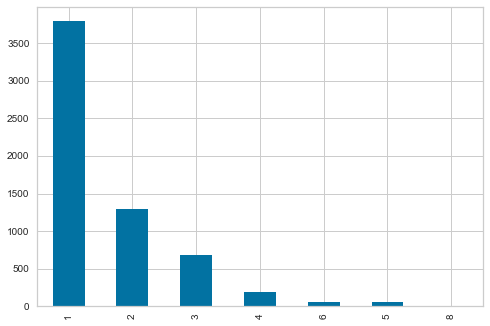

In [20]:
soldiers['DODRace'].value_counts().plot(kind='bar');

In [21]:
soldiers['DODRace'] = soldiers['DODRace'].map({1: 'White',
                  2: 'Black',
                  3: 'Hispanic',
                  4: 'Asian',
                  5: 'Native_American',
                  6: 'Pacific_Islander',
                  8: 'Other'})

In [22]:
soldiers['DODRace'].value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific_Islander      59
Native_American       49
Other                  3
Name: DODRace, dtype: int64

In [23]:
soldiers.Gender

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
6063    Female
6064    Female
6065    Female
6066    Female
6067    Female
Name: Gender, Length: 6068, dtype: object

In [24]:
soldiers2 = soldiers[(soldiers['DODRace']=='White')|(soldiers['DODRace']=='Black')| (soldiers['DODRace']=='Hispanic')]

In [25]:
soldiers2.reset_index(drop = True, inplace = True)
soldiers2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995

In [26]:
soldiers2.select_dtypes('object')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,White,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,White,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Black,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,White,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Black,Right hand
...,...,...,...,...,...,...,...,...,...
5764,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Hispanic,Right hand
5765,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Hispanic,Right hand
5766,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Black,Right hand
5767,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Hispanic,Right hand


In [27]:
soldiers2.drop(['Date', 'PrimaryMOS', 'WritingPreference', "Installation","Component", "Branch"], inplace = True, axis = 1)

In [28]:
soldiers2.select_dtypes('object')

,Gender,SubjectsBirthLocation,DODRace
0,Male,North Dakota,White
1,Male,New York,White
2,Male,New York,Black
3,Male,Wisconsin,White
4,Male,North Carolina,Black
...,...,...,...
5764,Female,Texas,Hispanic
5765,Female,Texas,Hispanic
5766,Female,Texas,Black
5767,Female,Texas,Hispanic


In [29]:
soldiers2.weightkg/10

0       81.5
1       72.6
2       92.9
3       79.4
4       94.6
        ... 
5764    83.2
5765    71.7
5766    76.2
5767    63.2
5768    61.0
Name: weightkg, Length: 5769, dtype: float64

In [30]:
soldiers2.drop(['Heightin', 'Weightlbs'], axis=1, inplace=True)

In [31]:
soldiers2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,White,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,White,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,Black,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,White,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,Black,21


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [32]:
X = soldiers2.drop('DODRace', axis=1)
y = soldiers2['DODRace']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
from sklearn.compose import ColumnTransformer

def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    
    return X_train, X_test

In [36]:
X_train, X_test = trans_2(X_train, X_test)

In [37]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 225)
Train target shape   :  (4615,)
Test features shape  :  (1154, 225)
Test target shape    :  (1154,)


In [38]:
#!pip install -U scikit-learn

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), list(X_train.select_dtypes("object").columns)), 
                                       remainder=MinMaxScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [42]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  12   7]
 [  5 111  20]
 [ 25  91 642]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  21  456   66]
 [  60  358 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [43]:
from sklearn.metrics import make_scorer
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [44]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.603480
test_precision_Hispanic    0.493124
test_recall_Hispanic       0.780707
dtype: float64

### Logistic Model GridsearchCV

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

In [47]:
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

In [48]:
from sklearn.model_selection import GridSearchCV
 
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 
# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20) 
# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None] 
# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"] 
# to get all the combinations of penalty, C, class_weight and solver
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 



In [49]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [50]:
log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [51]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [])])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [52]:
#grid_model.fit(X_train,y_train)

In [53]:
log_model_grid.best_params_ # to get the best parameters according to the best score

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [54]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test) 

Test_Set
[[241  12   7]
 [  5 111  20]
 [ 25  91 642]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  21  456   66]
 [  60  358 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



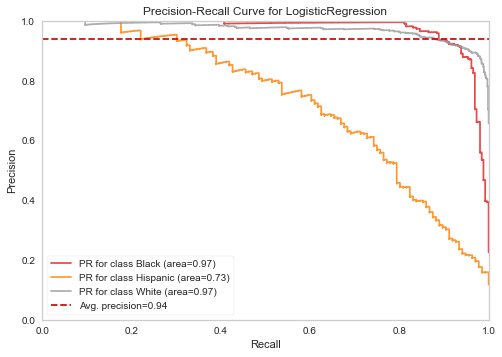

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [56]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
operations_svc = [('OneHotEncoder',column_trans),("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [59]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 18 111 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.47      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   40   41]
 [  24  454   65]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [60]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.569342
test_precision_Hispanic    0.452816
test_recall_Hispanic       0.767907
dtype: float64

###  SVC Model GridsearchCV

In [61]:
param_grid = {
    'svc__C': [3,4,5],
    'svc__gamma': ["scale", "auto", 1, 0.1]
}

In [62]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [63]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [3, 4, 5],
                         'svc__gamma': ['scale', 'auto', 1, 0.1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [64]:
svm_model_grid.best_params_

{'svc__C': 4, 'svc__gamma': 'scale'}

In [65]:
svm_model_grid.best_score_

0.7586816173972137

In [66]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  11  10]
 [  5 109  22]
 [ 22  86 650]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.53      0.80      0.64       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 979   28   31]
 [  13  476   54]
 [  43  320 2671]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1038
    Hispanic       0.58      0.88      0.70       543
       White       0.97      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



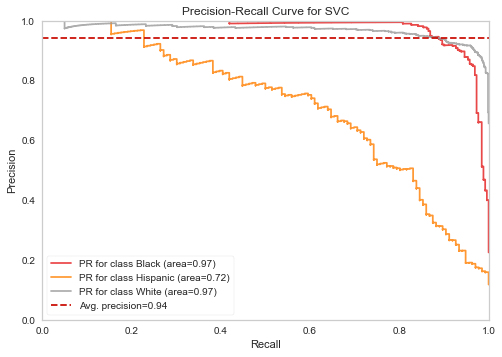

In [67]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=4, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [68]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [69]:
cat = X.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [71]:
X = soldiers2.drop("DODRace",axis=1)
y = soldiers2.DODRace

In [72]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,1,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,2,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,1,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,2,21


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

In [74]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [76]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[242   7  11]
 [ 19  86  31]
 [ 11  15 732]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.80      0.63      0.70       136
       White       0.95      0.97      0.96       758

    accuracy                           0.92      1154
   macro avg       0.88      0.84      0.86      1154
weighted avg       0.92      0.92      0.92      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [77]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.726698
test_precision_Hispanic    0.855109
test_recall_Hispanic       0.633571
dtype: float64

### RF Model GridsearchCV

In [78]:
param_grid = {'RF_model__n_estimators':[420,470],
             'RF_model__max_depth':[6,8]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [79]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [80]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [6, 8],
                         'RF_model__n_estimators': [420, 470]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [81]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        n_estimators=470, random_state=101))])

In [82]:
rf_grid_model.best_params_

{'RF_model__max_depth': 6, 'RF_model__n_estimators': 470}

In [83]:
rf_grid_model.best_score_

0.8379714576962284

In [84]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[236  21   3]
 [ 16 115   5]
 [  9  45 704]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       260
    Hispanic       0.64      0.85      0.73       136
       White       0.99      0.93      0.96       758

    accuracy                           0.91      1154
   macro avg       0.84      0.89      0.86      1154
weighted avg       0.93      0.91      0.92      1154


Train_Set
[[ 983   53    2]
 [  25  513    5]
 [  22  129 2883]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.74      0.94      0.83       543
       White       1.00      0.95      0.97      3034

    accuracy                           0.95      4615
   macro avg       0.90      0.95      0.92      4615
weighted avg       0.96      0.95      0.95      4615



In [85]:
from yellowbrick.classifier import PrecisionRecallCurve

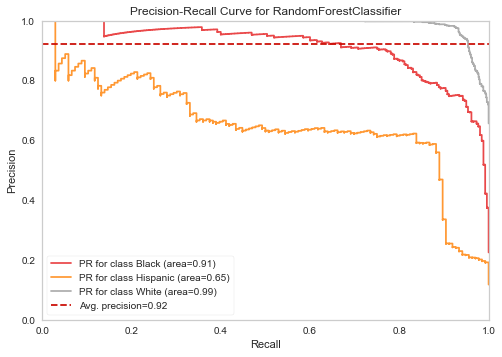

In [86]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [87]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [88]:
# !pip install xgboost==0.90

In [89]:
import xgboost as xgb

xgb.__version__

'0.90'

In [90]:
from xgboost import XGBClassifier

In [91]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [92]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [93]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [94]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [95]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[250   5   5]
 [  0 136   0]
 [ 12  17 729]]
              precision    recall  f1-score   support

       Black       0.95      0.96      0.96       260
    Hispanic       0.86      1.00      0.93       136
       White       0.99      0.96      0.98       758

    accuracy                           0.97      1154
   macro avg       0.94      0.97      0.95      1154
weighted avg       0.97      0.97      0.97      1154


Train_Set
[[1036    2    0]
 [   0  543    0]
 [  21   50 2963]]
              precision    recall  f1-score   support

       Black       0.98      1.00      0.99      1038
    Hispanic       0.91      1.00      0.95       543
       White       1.00      0.98      0.99      3034

    accuracy                           0.98      4615
   macro avg       0.96      0.99      0.98      4615
weighted avg       0.99      0.98      0.98      4615



In [96]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.907483
test_precision_Hispanic    0.873279
test_recall_Hispanic       0.946619
dtype: float64

In [97]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = None, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score    0.971398
dtype: float64

### XGBoost Model GridsearchCV

In [98]:
param_grid = {"XGB_model__n_estimators":[40, 60],
              'XGB_model__max_depth':[2,3],
              "XGB_model__learning_rate": [0.2, 0.5],
              "XGB_model__subsample":[0.6, 0.9],
              "XGB_model__colsample_bytree":[0.6, 0.9]}

In [99]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [100]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.6, learning_rate=0.2,
                               max_depth=2, n_estimators=40,
                               objective='multi:softprob', random_state=101,
                               subsample=0.6))])

In [101]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.6,
 'XGB_model__learning_rate': 0.2,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.6}

In [102]:
xgb_grid_model.best_score_

0.9539925246347265

In [103]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[247  10   3]
 [  1 134   1]
 [ 10  30 718]]
              precision    recall  f1-score   support

       Black       0.96      0.95      0.95       260
    Hispanic       0.77      0.99      0.86       136
       White       0.99      0.95      0.97       758

    accuracy                           0.95      1154
   macro avg       0.91      0.96      0.93      1154
weighted avg       0.96      0.95      0.95      1154


Train_Set
[[1013   22    3]
 [   9  530    4]
 [  18   87 2929]]
              precision    recall  f1-score   support

       Black       0.97      0.98      0.97      1038
    Hispanic       0.83      0.98      0.90       543
       White       1.00      0.97      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.93      0.97      0.95      4615
weighted avg       0.97      0.97      0.97      4615



In [104]:
# !pip install scikit-plot

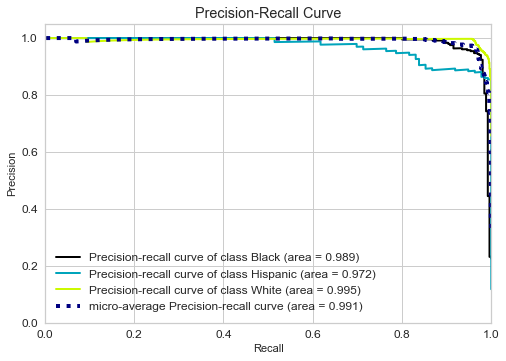

In [105]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score

perations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [106]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9721887064639066

In [107]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

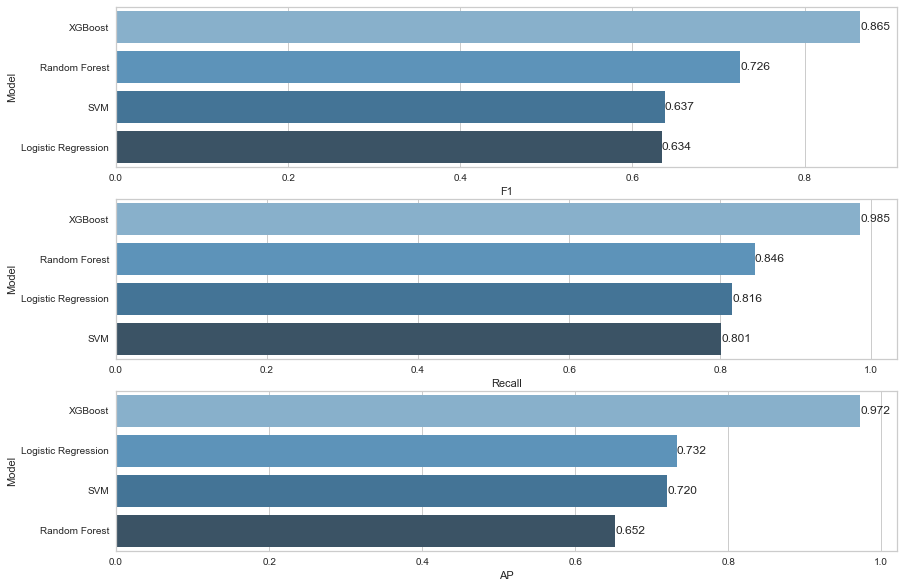

In [108]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [109]:
# !pip install imblearn

In [110]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

## SVC Over/Under Sampling

In [111]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [112]:
X_train_ohe = column_trans.fit_transform(X_train)

In [113]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [114]:
X_over.shape

(9102, 225)

In [115]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [116]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [117]:
X_under.shape

(1629, 225)

In [118]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [119]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [120]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [121]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [122]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [123]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [124]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [125]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [126]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [127]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [128]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.9107348339361192

In [129]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.9085045899068179

In [130]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [131]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] #("scaler", MinMaxScaler())

In [132]:
smote_pipeline = imbpipeline(steps=operations)

In [133]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [134]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[236   8  16]
 [  3 100  33]
 [ 14  41 703]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.67      0.74      0.70       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.86      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 949   30   59]
 [  22  389  132]
 [  29  156 2849]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93      1038
    Hispanic       0.68      0.72      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [135]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.644084
test_precision_Hispanic    0.637602
test_recall_Hispanic       0.653670
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [136]:
# !pip install shap

In [137]:
#import shap
#explainer = shap.Explainer(pipe_log_model,X_train)
#start_index = 203
#end_index = 204
#shap_values = explainer.shap_values(X_test[start_index:end_index])

In [138]:
#shap_values

In [139]:
#print(shap_values[0].shape)

In [140]:
# %% >> Visualize local predictions
#shap.initjs()
# Force plot
#prediction = log_model.predict(X_test[start_index:end_index])[0]
#print(f"The log_model predicted: {prediction}")
#shap.force_plot(explainer.expected_value[1],
                #shap_values[1],
                #X_test[start_index:end_index], # for values
                #feature_names= X.columns,) 

In [141]:
#shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [142]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [143]:
X_train_trans

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.67601246e-01, 7.08382527e-04, 1.95121951e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.26168224e-01, 0.00000000e+00, 3.90243902e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.79127726e-01, 0.00000000e+00, 4.63414634e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.51090343e-01, 0.00000000e+00, 9.75609756e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.17757009e-01, 2.36127509e-05, 1.46341463e-01],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.01557632e-01, 0.00000000e+00, 2.92682927e-01]])

In [144]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[242  10   8]
 [  5 111  20]
 [ 26  92 640]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 972   34   32]
 [  19  453   71]
 [  64  350 2620]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.83      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [145]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.594026
test_precision_Hispanic    0.486588
test_recall_Hispanic       0.764220
dtype: float64

In [146]:
X_train.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [147]:
features = column_trans_shap.get_feature_names_out(X_train.columns)
features

array(['onehotencoder__Gender_0.0', 'onehotencoder__Gender_1.0',
       'onehotencoder__SubjectsBirthLocation_0.0',
       'onehotencoder__SubjectsBirthLocation_1.0',
       'onehotencoder__SubjectsBirthLocation_2.0',
       'onehotencoder__SubjectsBirthLocation_3.0',
       'onehotencoder__SubjectsBirthLocation_4.0',
       'onehotencoder__SubjectsBirthLocation_5.0',
       'onehotencoder__SubjectsBirthLocation_6.0',
       'onehotencoder__SubjectsBirthLocation_7.0',
       'onehotencoder__SubjectsBirthLocation_8.0',
       'onehotencoder__SubjectsBirthLocation_9.0',
       'onehotencoder__SubjectsBirthLocation_10.0',
       'onehotencoder__SubjectsBirthLocation_11.0',
       'onehotencoder__SubjectsBirthLocation_12.0',
       'onehotencoder__SubjectsBirthLocation_13.0',
       'onehotencoder__SubjectsBirthLocation_15.0',
       'onehotencoder__SubjectsBirthLocation_16.0',
       'onehotencoder__SubjectsBirthLocation_17.0',
       'onehotencoder__SubjectsBirthLocation_18.0',
       'o

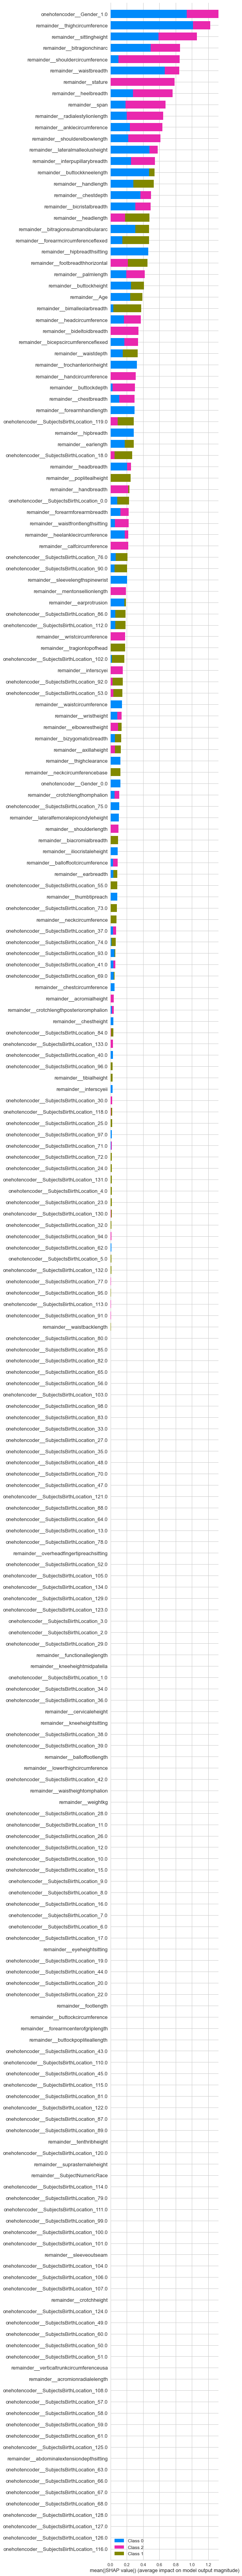

In [148]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, max_display=300,feature_names = features, plot_type="bar")

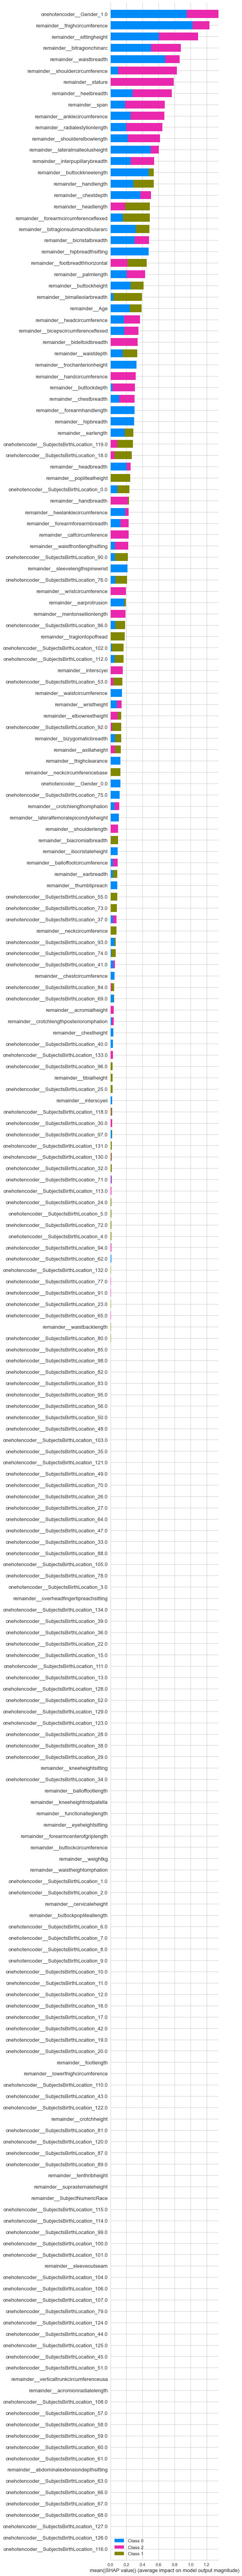

In [149]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, X_train_trans, max_display=300,feature_names = features)

In [150]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth',  'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [151]:
X2 = X[hispanic]
X2.head()

,SubjectsBirthLocation,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,91.0,193,299,206,291,101,71,437,240,140,493,436,401,882,619,71,1347,41
1,86.0,195,289,201,320,98,67,417,225,120,479,420,394,870,584,62,1293,35
2,86.0,203,357,202,330,103,75,431,255,125,544,434,427,901,623,61,1327,42
3,133.0,194,318,199,309,106,73,393,205,127,518,446,401,821,560,66,1239,31
4,90.0,218,324,197,310,111,80,523,214,122,524,430,435,1080,706,56,1478,21


In [152]:
X2 = X[hispanic]
y = soldiers2.DODRace

In [153]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index([], dtype='object')

In [154]:
X2.shape

(5769, 18)

In [155]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [156]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index([], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [157]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[205  22  33]
 [ 18  87  31]
 [128 197 433]]
              precision    recall  f1-score   support

       Black       0.58      0.79      0.67       260
    Hispanic       0.28      0.64      0.39       136
       White       0.87      0.57      0.69       758

    accuracy                           0.63      1154
   macro avg       0.58      0.67      0.58      1154
weighted avg       0.74      0.63      0.65      1154


Train_Set
[[ 812   92  134]
 [  64  343  136]
 [ 433  842 1759]]
              precision    recall  f1-score   support

       Black       0.62      0.78      0.69      1038
    Hispanic       0.27      0.63      0.38       543
       White       0.87      0.58      0.69      3034

    accuracy                           0.63      4615
   macro avg       0.59      0.66      0.59      4615
weighted avg       0.74      0.63      0.66      4615



In [158]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.375649
test_precision_Hispanic    0.268369
test_recall_Hispanic       0.628013
dtype: float64

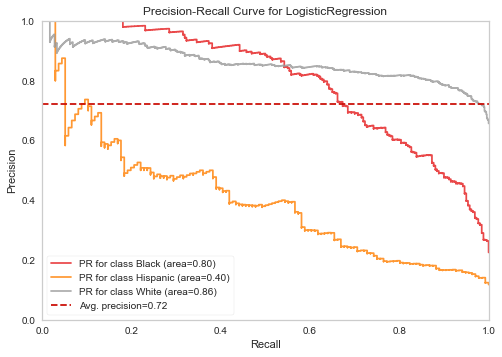

In [159]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

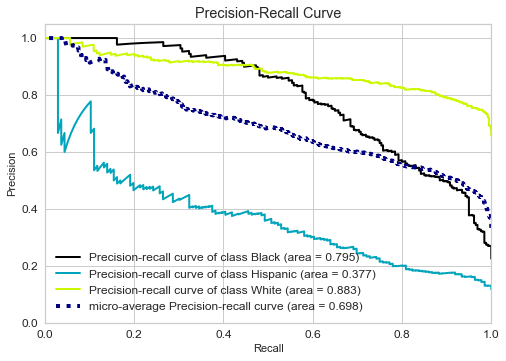

In [160]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [161]:
column_trans_final = make_column_transformer((ord_enc, cat), remainder='passthrough')

operations_final = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

param_grid = {"XGB_model__colsample_bytree":[0.6],
              "XGB_model__learning_rate": [0.2],
              'XGB_model__max_depth':[2],
              "XGB_model__n_estimators":[40],
              "XGB_model__subsample":[0.6]
              }

with_xgb_model = Pipeline(steps=operations_final)

final_model = GridSearchCV(with_xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2)

In [162]:
# column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       #remainder=MinMaxScaler())

# operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          #random_state=101))]

# final_model = Pipeline(steps=operations_final)

In [163]:
final_model.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.6],
                         'XGB_model__learning_rate': [0.2],
                         'XGB_model__max_depth': [2],
                         'XGB_model__n_estimators': [40],
                         'XGB_model__subsample': [0.6]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [164]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,Age
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.175420,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.661640,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.665280,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.757670,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.409950,916.817126,230.459178,377.352054,1033.591090,800.981106,169.308372,831.334547,0.675854,71.718495,16.894436,29.776391
std,37.457748,78.303123,20.444554,15.965783,71.260913

In [165]:
mean_human = X.describe(include="all").loc["mean"]
mean_human

abdominalextensiondepthsitting     247.254290
acromialheight                    1408.630265
acromionradialelength              328.071590
anklecircumference                 225.201768
axillaheight                      1301.902583
balloffootcircumference            244.408043
balloffootlength                   195.118911
biacromialbreadth                  399.706015
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bideltoidbreadth                   491.454845
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc          306.677760
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockheight                      872.112845
buttockkneelength                  610.449991
buttockpopliteallength             498.331773
calfcircumference                  386.316519
cervicaleheight                   

In [166]:
mean_human["Gender"] = "Male"
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Right hand"

In [167]:
pd.DataFrame(mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,Age,WritingPreference
mean,247.25429,1408.630265,328.07159,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.67776,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.17542,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.66164,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.66528,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.75767,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.40995,916.817126,230.459178,377.352054,1033.59109,800.981106,169.308372,831.334547,Male,California,16.894436,29.776391,Right hand


In [168]:
final_model.predict(pd.DataFrame(mean_human).T)

array(['Black'], dtype=object)

In [169]:
y[201]

'Hispanic'

In [170]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [171]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.9366190785222257

In [172]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.9365952897151851

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___